# Python Animation

In [8]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


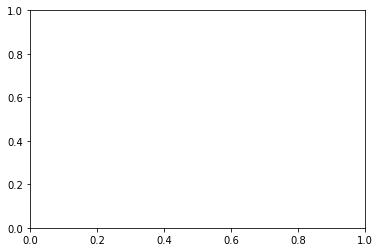

In [12]:
from matplotlib import animation
import matplotlib.pyplot as plt

countries_plot = ['Spain', 'Italy', 'United States']
linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

def update_linechart(i):
  for j in range(len(colors)):
    country = countries_plot[j]
    color = colors[j]

    data = linechart_plot.loc[linechart_plot['country'] == country,:]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)

In [13]:
num_frames = len(linechart_plot['year'].unique())        
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('linechart.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


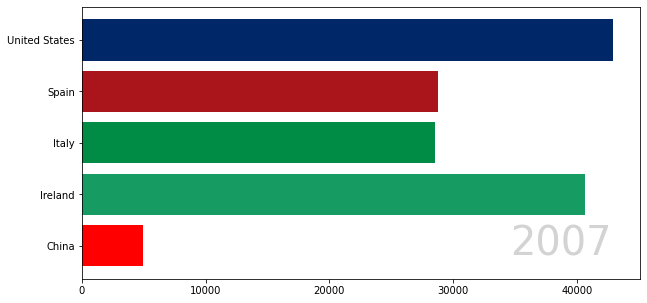

In [19]:
countries_plot = ['Spain', 'Italy', 'United States','Ireland','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(countries_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :]

fig, ax = plt.subplots(figsize=(10, 5))
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


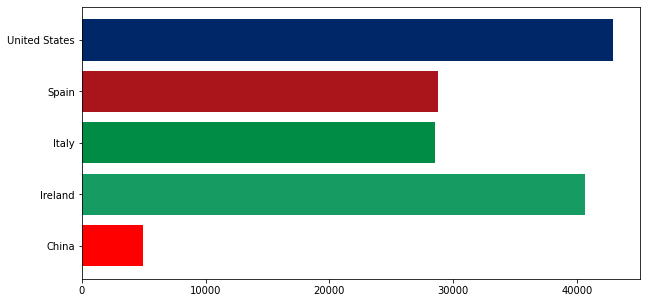

In [20]:
countries_plot = ['Spain', 'Italy', 'United States','Ireland','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(countries_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]

  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)
  label.set_text(year)

anim = animation.FuncAnimation(fig, update_barchart, frames = len(years))
anim.save('barchart.gif')  

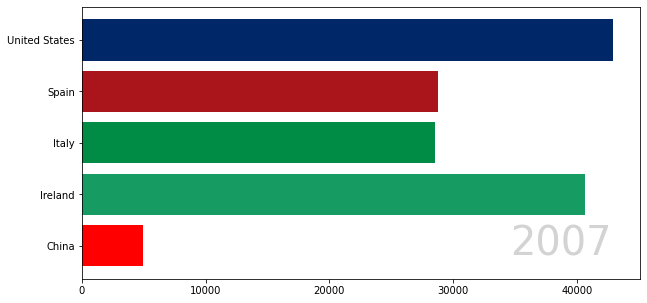

In [12]:
countries_plot = ['Spain', 'Italy', 'United States','Ireland','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(countries_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :]

fig, ax = plt.subplots(figsize=(10, 5))
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


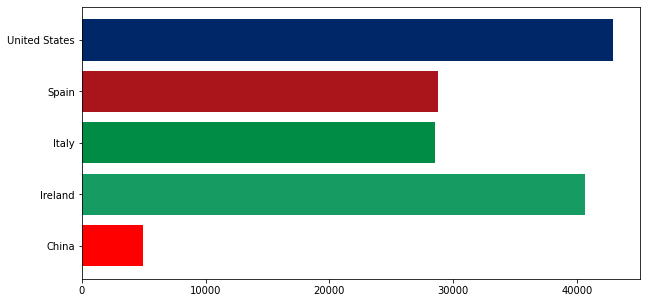

In [15]:
countries_plot = ['Spain', 'Italy', 'United States','Ireland','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(countries_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]

  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country, data_temp.gdpPercap, color = colors)
  label.set_text(year)

anim = animation.FuncAnimation(fig, update_barchart, frames = len(years))
anim.save('barchart.gif')

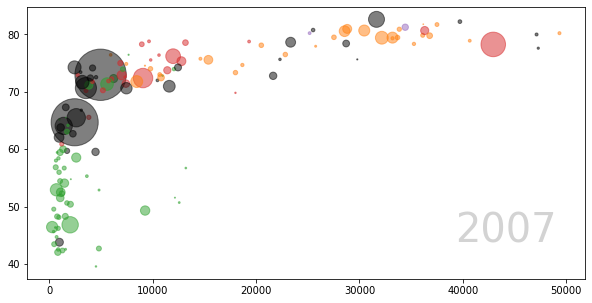

In [21]:
import numpy as np
import matplotlib

fig, ax = plt.subplots(figsize=(10, 5))

scatter_data = gapminder.copy()

# Create a color depending on
conditions = [
  scatter_data.continent == 'Asia',
  scatter_data.continent == 'Europe',
  scatter_data.continent == 'Africa',
  scatter_data.continent == 'Americas',
  scatter_data.continent == 'Oceania',
]

values = list(range(5))

scatter_data['color'] = np.select(conditions, values)


font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]
label = ax.text(0.95, 0.25, years[-1],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)
s
scatter = ax.scatter(data_temp.gdpPercap,
                     data_temp.lifeExp,
                     s=data_temp['pop']/500000, 
                     alpha = 0.5, 
                     c=data_temp.color, 
                     cmap=cmap,
                     norm=norm)
label.set_text(years[-1])
plt.show()